In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):  # one-hot encoding
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # sequence is a list
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [3]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,))) # Hidden Layer1
model.add(layers.Dense(16, activation = 'relu')) # Hidden Layer2
model.add(layers.Dense(1, activation = 'sigmoid')) # Scoring

In [4]:
from keras import optimizers

model.compile(optimizer='rmsprop',  # set optimizer
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [5]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [6]:
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,  # fit function trains model
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 36ms/step - loss: 0.6029 - acc: 0.6806 - val_loss: 0.3983 - val_acc: 0.8731
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3323 - acc: 0.8991 - val_loss: 0.3168 - val_acc: 0.8825
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2285 - acc: 0.9311 - val_loss: 0.2867 - val_acc: 0.8884
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1796 - acc: 0.9444 - val_loss: 0.3047 - val_acc: 0.8783
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1474 - acc: 0.9553 - val_loss: 0.2800 - val_acc: 0.8889
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1187 - acc: 0.9671 - val_loss: 0.3011 - val_acc: 0.8842
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0989 - acc: 0.9724 - val_loss: 0.3060 - val_acc: 0.8854
Epoch 8/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0835 - a

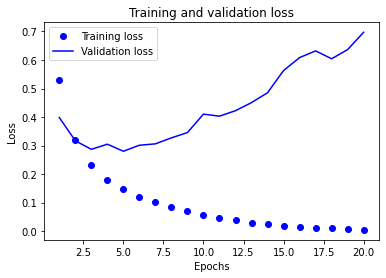

In [7]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss') # make a graph
plt.plot(epochs, val_loss, 'b', label = 'Validation loss') # make a graph
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

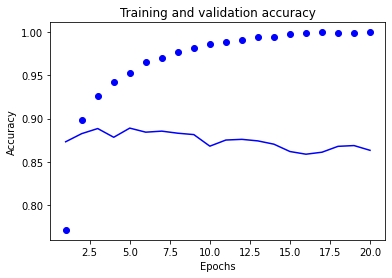

In [8]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend

plt.show()

In [9]:
print(model.evaluate(x_test,y_test)) #Test

782/782 [==============================] - 2s 2ms/step - loss: 0.7768 - acc: 0.8475
[0.7767902612686157, 0.8475199937820435]
